In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('weatherHistory.csv', parse_dates=['Formatted Date'])
df_columns = df.columns

df = df.drop_duplicates(['Formatted Date'], keep='first')
df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']]
df.reset_index(inplace=True, drop=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


In [3]:
df.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [4]:
numerical_features = df.columns
sns.set(rc={'figure.figsize':(10,2)})

<AxesSubplot:>

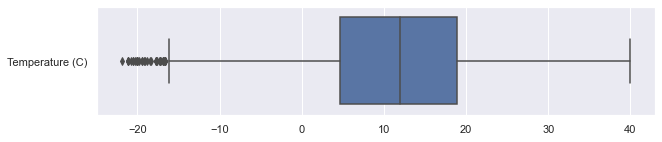

In [5]:
feature_name = numerical_features[0]
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

<AxesSubplot:>

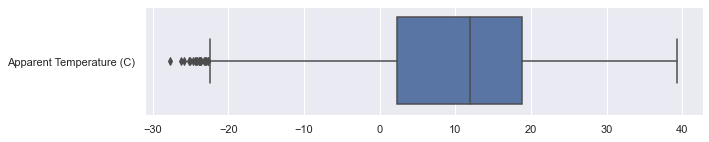

In [6]:
feature_name = numerical_features[1]
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

<AxesSubplot:>

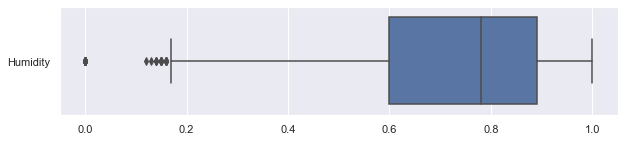

In [7]:
feature_name = numerical_features[2]
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

In [8]:
print('Humidity 0 rows count', temp_df[temp_df[feature_name] == 0.0].count())
df = df[df[feature_name] != 0.0]
print(df.shape)

Humidity 0 rows count Humidity    22
dtype: int64
(96407, 3)


<AxesSubplot:>

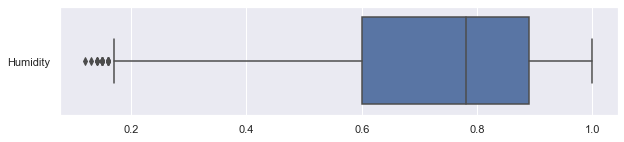

In [9]:
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

## Q-Q Plots & Histograms

In [10]:
sns.set(rc={'figure.figsize':(6,12)})

#### Q-Q Plots

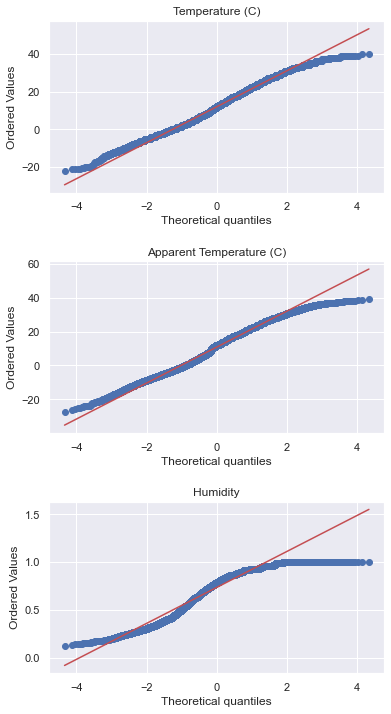

In [11]:
fig, axes = plt.subplots(3)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(numerical_features):
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].set_title(column)
plt.show()

#### Histograms

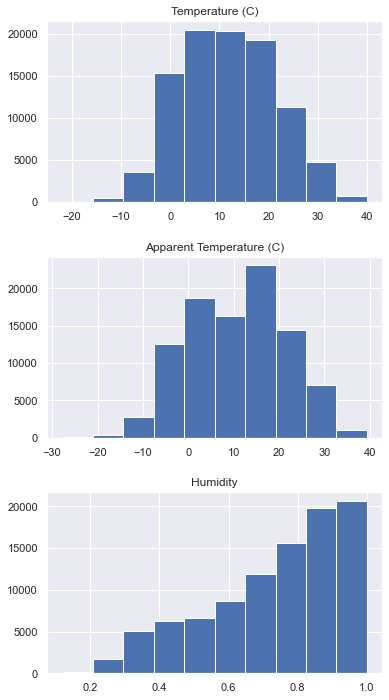

In [12]:
fig, axes = plt.subplots(3)
for i, column in enumerate(numerical_features):
    temp_df = pd.DataFrame(df[column], columns=[column])
    temp_df.hist(ax=axes[i])
plt.show()

## Perform Transformations
#### Humidity

array([<AxesSubplot:title={'center':'Humidity'}>], dtype=object)

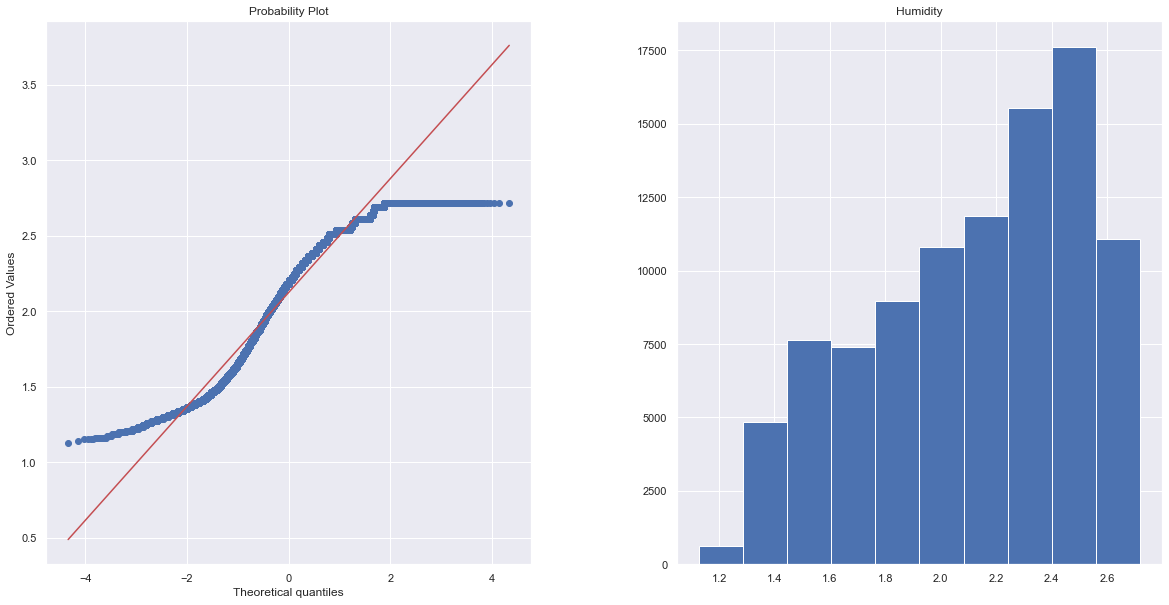

In [13]:
feature_name = 'Humidity';
exponential_transformer = FunctionTransformer(np.exp, validate=True)
data_transformed = exponential_transformer.transform(df[[feature_name]])
df[feature_name] = data_transformed

sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(1,2)
stats.probplot(df[feature_name], dist="norm", plot=axes[0])
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

## Split data to train and test

In [14]:
target_col = 'Apparent Temperature (C)'
df_features = df.drop(target_col, axis=1)
df_target = pd.DataFrame(df[target_col], columns=[target_col])
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(77125, 2)
(19282, 2)


In [15]:
x_train.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

## Data Scaling/Standardization
#### For feature data

In [16]:
scaler_train = StandardScaler()

scaler_train.fit(x_train)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_train.transform(x_test)
x_train = pd.DataFrame(x_train_scaled, columns = [x_train.columns])
x_test = pd.DataFrame(x_test_scaled, columns = [x_test.columns])
x_train.head()

,Temperature (C),Humidity
0,-0.668209,-0.285712
1,-0.488829,-0.540087
2,-0.510378,-1.231168
3,1.581616,-1.188251
4,0.950873,0.320766


#### For target data

In [17]:
scaler_target = StandardScaler()

scaler_target.fit(y_train)
y_train_scaled = scaler_target.transform(y_train)
y_test_scaled = scaler_target.transform(y_test)
y_train = pd.DataFrame(y_train_scaled, columns = [target_col])
y_test = pd.DataFrame(y_test_scaled, columns = [target_col])
y_train.head()

,Apparent Temperature (C)
0,-0.841207
1,-0.827170
2,-0.774660
3,1.557082
4,0.949841


## Model building

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

### Check accuracy

In [19]:
predictions = lm.predict(x_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [20]:
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error :', round(rmsq, 4))

# Accuracy
score = lm.score(x_test, y_test)
print('Explained variance of the predictions :', round(score * 100, 4))

Mean squared error : 0.0137
Root mean squared error : 0.1171
Explained variance of the predictions : 98.6304


### Store model in file system

In [21]:
import pickle

# save the model to disk
model_filename = 'model.sav'
pickle.dump(model, open(model_filename, 'wb'))

### How to load back from the file system

In [22]:
# load the model from disk
loaded_model = pickle.load(open(model_filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(round(result, 4))

0.9863
